# Handling Imbalance Dataset SMOTE

**SMOTE stands for Synthetic Minority Oversampling Technique. It is a method used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE generates synthetic instances of the minority class by interpolating between existing instances.**

## Creating Imbalanced Dataset

In [16]:
# Let's create some random samples to demonstrate

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.90, 0.10],
                           random_state=12,
                           n_redundant=0)

In [17]:
# Creating datafrma for visualization
import pandas as pd

features_df = pd.DataFrame(X, columns=['feature1', 'feature2'])
target_df = pd.DataFrame(y, columns=['target'])
df = pd.concat([features_df, target_df], axis=1)
df.head()

,feature1,feature2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [18]:
df['target'].value_counts()

target
0    899
1    101
Name: count, dtype: int64

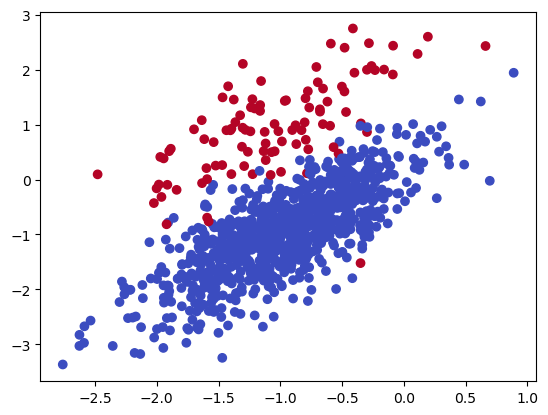

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df["feature1"], df["feature2"], c=df["target"], cmap='coolwarm')
plt.show()

A scatter plot is created using matplotlib to visualize the distribution of the two classes.

## Using SMOTE
**The imbalanced-learn library is required for SMOTE. It can be installed using pip. After installation, the SMOTE class is imported from imblearn.over_sampling.**

In [21]:
# If it is not available in your system. Remove the comment to install

#!pip install imblearn

In [24]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [25]:
X_res, y_res = oversample.fit_resample(df[["feature1", "feature2"]], df["target"])

df_res = pd.concat([pd.DataFrame(X_res, columns=['feature1', 'feature2']), pd.DataFrame(y_res, columns=['target'])], axis=1)
df_res['target'].value_counts()

target
0    899
1    899
Name: count, dtype: int64

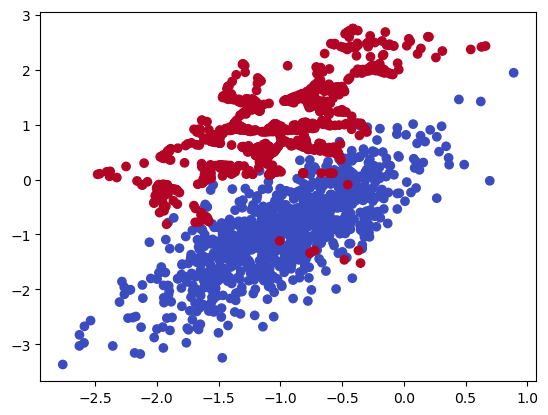

In [26]:
plt.scatter(df_res["feature1"], df_res["feature2"], c=df_res["target"], cmap='coolwarm')
plt.show()

**Conclusion**

After applying SMOTE, the number of data points for the minority class increases, resulting in a balanced dataset. This makes it more suitable for applying machine learning algorithms to solve classification problems. SMOTE is an important technique in feature engineering for handling imbalanced datasets.